# Exploring Keyboard Data

1. Load the data
    - Create a dataframe of all data folders
    - additional features are Name of user, filename, Keyboard Material, microphone
2. Clean up where it's unknown
    - Impute values from online, or set generic value.


End result: One dataframe of information

Cluster data

Visualize those clusters

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import yaml

In [43]:
# Define the path to the data folder
data_folder = '../data_copy/'

# Initialize an empty list to store the data
key_data_list = []
sentence_data_list = []

# Loop through all user folders in the data folder
for user_folder in os.listdir(data_folder):
    if 'Keystroke' in user_folder:
        continue
    user_folder_path = os.path.join(data_folder, user_folder)
    if os.path.isdir(user_folder_path):  # Check if it's a directory
        key_folder_path = os.path.join(user_folder_path, 'data', 'key_data')
        sentence_folder_path = os.path.join(user_folder_path, 'data', 'sentence_data')

        # Key data, then sentence data
        # for internal_folder in [key_folder_path, sentence_folder_path]:
        for file_name in os.listdir(key_folder_path):
            # key_folder_path = os.path.join(data_folder, user_folder)
            # Check if the file is a YAML file
            if file_name.endswith('.yaml'):
                # Extract key_pressed value from the filename
                key_pressed = file_name.split('_')[2]
                
                # Construct the full path to the YAML file
                yaml_file_path = os.path.join(key_folder_path, file_name)
                
                # Read the YAML file and filter out the 'key_pressed' field and subsequent lines until 'keyboard_name'
                with open(yaml_file_path, 'r') as file:
                    lines = file.readlines()
                
                filtered_lines = []
                skip = False
                for line in lines:
                    if line.strip().startswith('key_pressed:'):
                        skip = True
                    if skip and line.strip().startswith('keyboard_name:'):
                        skip = False
                    if not skip:
                        filtered_lines.append(line)
                
                # Load the filtered lines into a dictionary
                yaml_data = yaml.safe_load(''.join(filtered_lines))
                
                # Add the user, audio file name, and key_pressed information
                yaml_data['user'] = user_folder
                yaml_data['audio_file'] = file_name.replace('.yaml', '.wav')  # Assuming audio files are in .wav format
                yaml_data['key_pressed'] = key_pressed
                
                # Append the data to the list
                key_data_list.append(yaml_data)

# Convert the list of dictionaries to a DataFrame
key_df = pd.DataFrame(key_data_list)
sentence_df = pd.DataFrame(sentence_data_list)

# Display the DataFrame
key_df.head()

,default_high_input_latency,default_high_output_latency,default_low_input_latency,default_low_output_latency,default_samplerate,hostapi,index,keyboard_name,keyboard_size,keyboard_type,max_input_channels,max_output_channels,name,switch_color,timestamp,user,audio_file,key_pressed
0,0.18,0.18,0.09,0.09,44100.0,0,1,DropCTRLV1,80%_Tenkeyless,mechanical,2,0,Mic/Inst (Samson G-Track Pro),Halo True,1720383683,Basem,key_press_x_1720383683_Basem.wav,x
1,0.18,0.18,0.09,0.09,44100.0,0,1,DropCTRLV1,80%_Tenkeyless,mechanical,2,0,Mic/Inst (Samson G-Track Pro),Halo True,1720382929,Basem,key_press_]_1720382929_Basem.wav,]
2,0.18,0.18,0.09,0.09,44100.0,0,1,DropCTRLV1,80%_Tenkeyless,mechanical,2,0,Mic/Inst (Samson G-Track Pro),Halo True,1720383217,Basem,key_press_g_1720383217_Basem.wav,g
3,0.18,0.18,0.09,0.09,44100.0,0,1,DropCTRLV1,80%_Tenkeyless,mechanical,2,0,Mic/Inst (Samson G-Track Pro),Halo True,1720380641,Basem,key_press_1_1720380641_Basem.wav,1
4,0.18,0.18,0.09,0.09,44100.0,0,1,DropCTRLV1,80%_Tenkeyless,mechanical,2,0,Mic/Inst (Samson G-Track Pro),Halo True,1720380770,Basem,key_press_3_1720380770_Basem.wav,3


## Add Keyboard Material Column

In [44]:
key_df['keyboard_name'].unique()

material_mapper = {'DropCTRLV1': 'aluminum',
                   'Keychron Q3': 'aluminum'}

key_df['keyboard_material'] = key_df['keyboard_name'].map(material_mapper)
key_df.drop('keyboard_name', axis=1, inplace=True)

## Add Keyboard Microhone Column cleanup

In [45]:
key_df['name'].unique()

microphone_mapper = {'Mic/Inst (Samson G-Track Pro)': 'Samson_GTrack_Pro',
                     'Microphone (3- USB PnP Audio De': 'GenericPnP'}

key_df['microphone'] = key_df['name'].map(microphone_mapper)
key_df.drop('name', axis=1, inplace=True)

## Drop unneeded columns

In [46]:
unnecessary_cols = ['default_high_input_latency',
                    'default_high_output_latency',
                    'default_low_input_latency',
                    'default_low_output_latency',
                    'default_samplerate',
                    'hostapi',
                    'index',
                    'max_input_channels',
                    'max_output_channels',
                    'timestamp',]
key_df.drop(unnecessary_cols, axis=1, inplace=True)

In [47]:
key_df[key_df['key_pressed'] == 'p']

,keyboard_size,keyboard_type,switch_color,user,audio_file,key_pressed,keyboard_material,microphone
25,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382803_Basem.wav,p,aluminum,Samson_GTrack_Pro
27,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382823_Basem.wav,p,aluminum,Samson_GTrack_Pro
32,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382799_Basem.wav,p,aluminum,Samson_GTrack_Pro
125,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382820_Basem.wav,p,aluminum,Samson_GTrack_Pro
291,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382817_Basem.wav,p,aluminum,Samson_GTrack_Pro
310,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382806_Basem.wav,p,aluminum,Samson_GTrack_Pro
323,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382827_Basem.wav,p,aluminum,Samson_GTrack_Pro
390,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382810_Basem.wav,p,aluminum,Samson_GTrack_Pro
398,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382796_Basem.wav,p,aluminum,Samson_GTrack_Pro
448,80%_Tenkeyless,mechanical,Halo True,Basem,key_press_p_1720382813_Basem.wav,p,aluminum,Samson_GTrack_Pro


## One-hot encoding

keyboard sizes to ordinal encodings

In [48]:
# Let's do the keyboard
keyboard_sizes = {
    5: '100%_FullSize',
    4: '96%_Compact',
    3: '80%_Tenkeyless',
    2: '75%_Compact_Tenkeyless',
    1: '65%_Compact(Default for Macbooks)',
    0: '60%_Mini',
}

Switch_colors to switch_type
switch_type(clicky, tactile, linear, NA(membrane))


In [49]:
switches_dict = {
    'Clicky': [
        'Cherry MX Blue', 'Cherry MX Green', 'Cherry MX White',
        'Gateron Blue', 'Gateron Green',
    ],
    'Tactile': [
        'Cherry MX Brown', 'Cherry MX Clear',
        'Gateron Brown', 'Halo True', 'Halo Clear',
    ],
    'Linear': [
        'Cherry MX Red', 'Cherry MX Black', 'Cherry MX Silent Red', 'Cherry MX Speed Silver',
        'Gateron Red', 'Gateron Black', 'Gateron Silent Red', 'Gateron Yellow',
        'Cherry MX Grey', 'Gateron Clear', 'Gateron White',
    ]
}

def map_switch_type(switch):
    for key, values in switches_dict.items():
        if switch in values:
            return key
    print(f"{switch} was not in any category. setting to NA")
    return 'NA'  # If switch doesn't match any category

# Apply the mapping function to the 'switch_type' column
key_df['switch_color'] = key_df['switch_color'].map(lambda x: map_switch_type(x))
key_df.head()

,keyboard_size,keyboard_type,switch_color,user,audio_file,key_pressed,keyboard_material,microphone
0,80%_Tenkeyless,mechanical,Tactile,Basem,key_press_x_1720383683_Basem.wav,x,aluminum,Samson_GTrack_Pro
1,80%_Tenkeyless,mechanical,Tactile,Basem,key_press_]_1720382929_Basem.wav,],aluminum,Samson_GTrack_Pro
2,80%_Tenkeyless,mechanical,Tactile,Basem,key_press_g_1720383217_Basem.wav,g,aluminum,Samson_GTrack_Pro
3,80%_Tenkeyless,mechanical,Tactile,Basem,key_press_1_1720380641_Basem.wav,1,aluminum,Samson_GTrack_Pro
4,80%_Tenkeyless,mechanical,Tactile,Basem,key_press_3_1720380770_Basem.wav,3,aluminum,Samson_GTrack_Pro


In [50]:
# encoder = OneHotEncoder(sparse=False)
# one_hot_encoded_sklearn = encoder.fit_transform(key_df[['category']])

# Using OneHotEncoder from sklearn (for more complex scenarios)
# from sklearn.preprocessing import OneHotEncoder

Todo: Onehot encode switch_colors now that youve sorted them
ordinally encode the keyboard sizes
onehot encode the keyboard material(aluminum, plastic, wood)

## Final droppings

In [51]:
key_df['switch_color'].unique()

array(['Tactile', 'Linear'], dtype=object)

In [52]:
key_df.drop(['user', 'microphone', 'keyboard_type'], axis=1, inplace=True)
key_df.head()

,keyboard_size,switch_color,audio_file,key_pressed,keyboard_material
0,80%_Tenkeyless,Tactile,key_press_x_1720383683_Basem.wav,x,aluminum
1,80%_Tenkeyless,Tactile,key_press_]_1720382929_Basem.wav,],aluminum
2,80%_Tenkeyless,Tactile,key_press_g_1720383217_Basem.wav,g,aluminum
3,80%_Tenkeyless,Tactile,key_press_1_1720380641_Basem.wav,1,aluminum
4,80%_Tenkeyless,Tactile,key_press_3_1720380770_Basem.wav,3,aluminum


### View an example key

/tmp/ipykernel_41136/2612704803.py:10: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00088501 -0.00088501
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec = librosa.feature.melspectrogram(samples, sr=sr, n_mels=64, win_length=1024, hop_length=500)


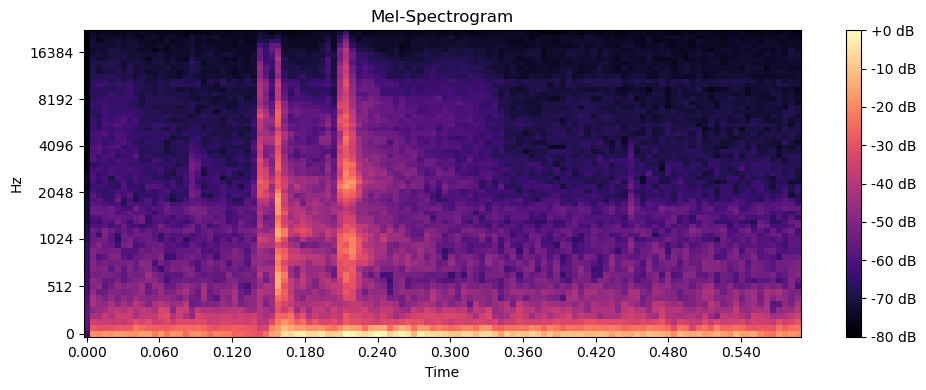

In [53]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
filename = '../data_copy/Basem/data/key_data/key_press_space_1720384124_Basem.wav'
samples, sr = librosa.load(filename, sr=None)

# Compute the mel-spectrogram
mel_spec = librosa.feature.melspectrogram(samples, sr=sr, n_mels=64, win_length=1024, hop_length=500)

# Convert to decibels for better visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=225, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

TODO:
- Add a name abbreviation for each audio file for the respective folders
- convert Switches to clicky or non clicky
    - Clicky: 
        - Bumpy
        - loud noise
        - Blue, green
    - Tactile:
        Bumpy, moderate noise. You feel the bump before it actuates. Usually no sound (halo clears, mx clears)
        - Brown, clear
    - Linear:
        - Smooth
        - COnsistent, almost no noise
        - Red, Yellow, Black

Sound:
    - Switch itself
    - Heavy the switch itself is
    - Mechanism of switch
    - Case material (plastic, aluminum, brass, combo)
    - Design(hwo much empty space)
    - Floating keycap design or not
    - Keycaps(ABS, PBT)
    - thickness of keycap.
    - shape of keycap
    - Lubed or not
    - Stabilizers present? Are they modded or not?


* **mel-spectrograms** as a method of feature extraction for a DL mode

* Augmentation:
    * Signals were time-shifted randomly by up to 40% in either direction.
        - Helps increase amount of data
    * Mel-spectrograms generated using:
        * 64 mel brands
        * Window length of 1024 samples
        * hop length of 500 (255 for macbook keystrokes, given their shorter length)
        - results in 64x64 images
    * After Mel-spectrograms, complete masking:
        * take random 10% of both time and frequency axis and setting all values within those ranges to the mean of the spectrogram.
            - 'blocking out' a portion of the image.
            - Called SpecAugment and was foudn to encourage the model to generalise and avoid overfitting.
    